# Hierarchical Clustering
One nice feature of hierachical clustering is that we can visualize the results as a dendrogram, a hierachical tree. Using the visualization, we can then decide how "deep" we want to cluster the dataset by setting a "depth" threshold. Or in other words, we don't need to make a decision about the number of clusters upfront.

#### Problem Statement: Management wants to know different market segment of a US town from collected data
##### - https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

A data given has with 32 observations on 11 variables.

- [, 1]	mpg	Miles/(US) gallon
- [, 2]	cyl	Number of cylinders
- [, 3]	disp	Displacement (cu.in.)
- [, 4]	hp	Gross horsepower
- [, 5]	drat	Rear axle ratio
- [, 6]	wt	Weight (1000 lbs)
- [, 7]	qsec	1/4 mile time
- [, 8]	vs	V/S - V Engine vs straight
- [, 9]	am	Transmission (0 = automatic, 1 = manual)
- [,10]	gear	Number of forward gears
- [,11]	carb	Number of carburetors

In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm


In [2]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')


In [3]:
data = pd.read_csv('mtcars.csv')

In [4]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
X = data.ix[:,1:].values


C:\Users\tarun.rao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


# Generating Hierarchical Clustering without Dendogram

Agglomerative hierarchical clustering is a bottom-up clustering method where clusters have sub-clusters, which in turn have sub-clusters, etc. The classic example of this is species taxonomy. Gene expression data might also exhibit this hierarchical quality (e.g. neurotransmitter gene families). Agglomerative hierarchical clustering starts with every single object (gene or sample) in a single cluster. Then, in each successive iteration, it agglomerates (merges) the closest pair of clusters by satisfying some similarity criteria, until all of the data is in one cluster.

The hierarchy within the final cluster has the following properties:

- Clusters generated in early stages are nested in those generated in later stages.
- Clusters with different sizes in the tree can be valuable for discovery.

In [6]:
k = 5
Hclustering = AgglomerativeClustering(n_clusters =k, affinity='euclidean', linkage='complete')
Hclustering.fit(X)
print("Models         :0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31")
print("Clustered Label:", Hclustering.labels_)

Models         :0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Clustered Label: [1 1 1 2 0 2 0 1 1 1 1 2 2 2 0 0 0 4 4 4 1 2 2 0 0 4 1 1 0 1 3 1]


#  Hierarchical Clustering Dendogram

In [7]:
Z = linkage(X, 'average')


<function matplotlib.pyplot.show>

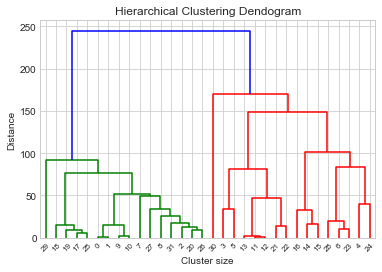

In [8]:
dendrogram(Z)
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show

### Selecting a Distance Cut-Off aka Determining the Number of Clusters
A huge jump in distance is typically what we're interested in if we want to argue for a certain number of clusters. If you have the chance to do this manually, you will always opt for that, as it allows you to gain some insights into your data and to perform some sanity checks on the edge cases.

<function matplotlib.pyplot.show>

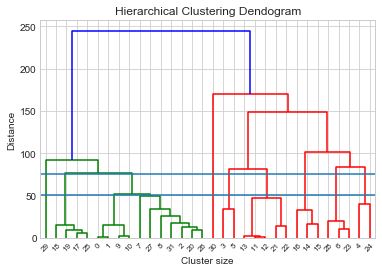

In [9]:
dendrogram(Z)
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.axhline(y=75)
plt.axhline(y=50)
plt.show

Reference: 
- http://scikit-learn.org/stable/modules/clustering.html 
- https://www.youtube.com/watch?v=JcfIeaGzF8A
- https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
- https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering
- http://www.dummies.com/programming/big-data/data-science/how-to-create-an-unsupervised-learning-model-with-dbscan/